# Titanic - Machine Learning from Disaster

Reference: Will Cukierski. Titanic - Machine Learning from Disaster. https://kaggle.com/competitions/titanic, 2012. Kaggle.

This is a practice for Classification model

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('~/Desktop/train.csv').drop(['PassengerId'], axis=1)
Id = pd.read_csv('~/Desktop/test.csv')['PassengerId']
df_test = pd.read_csv('~/Desktop/test.csv').drop(['PassengerId'], axis=1)

## Handle Missing Values

In [3]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
# Drop Cabin due to large volumn of missing values
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

# Drop Ticket as it Pclass already provided class info
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

In [6]:
# Fill Age missing value with its mean

age_mean = np.mean(df_train['Age'])
df_train['Age'] = df_train['Age'].fillna(age_mean)
df_test['Age'] = df_test['Age'].fillna(age_mean)

In [7]:
# Fill Embarked missing value with its mode

embarked_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(embarked_mode)
df_test['Embarked'] = df_test['Embarked'].fillna(embarked_mode)

In [8]:
# Fill Fare missing value with its mean
fare_mean = df_train['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(fare_mean)

In [9]:
df_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# EDA 

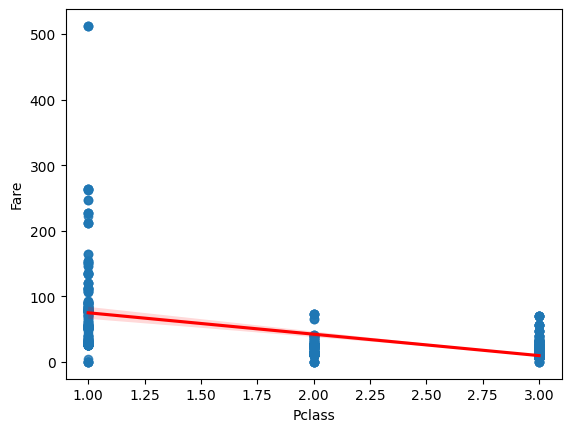

In [10]:
# relationship between passenger class and fare 
sns.regplot(data=df_train, x='Pclass', y='Fare', line_kws={'color':'r'})
plt.show()

In [11]:
print(df_train.corr(numeric_only=True)['Pclass']['Fare'])
df_train.groupby('Pclass').mean(numeric_only=True)

-0.5494996199439076


,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


## Feature Engineering

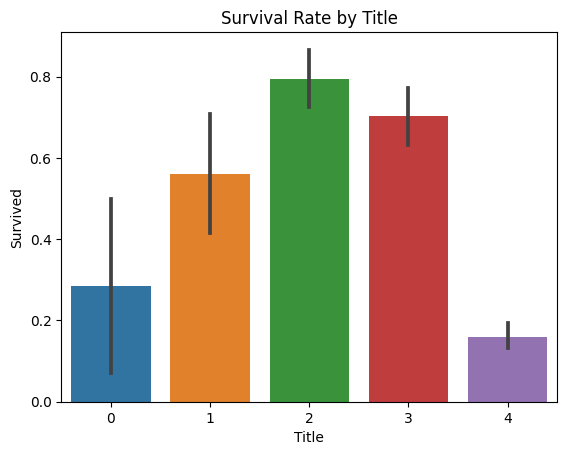

In [12]:
# title extraction
import re

def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)  
    return ""  

# Apply the function to the Name column
df_train['Title'] = df_train['Name'].apply(extract_title)
df_test['Title'] = df_test['Name'].apply(extract_title)

# Group rare titles
def group_titles(title):
    if title in ['Mr', 'Don', 'Sir', 'Capt', 'Major', 'Col']:  
        return 'Mr'
    elif title in ['Master', 'Jonkheer']:  
        return 'Master'
    elif title in ['Mrs', 'Mme', 'Lady']:  
        return 'Mrs'
    elif title in ['Miss', 'Ms', 'Mlle']:  
        return 'Miss'
    else:
        return 'Others'  

# Apply the grouping function
df_train['Title'] = df_train['Title'].apply(group_titles)
df_test['Title'] = df_test['Title'].apply(group_titles)

title_mapping = {'Others':0, 'Master':1, 'Mrs':2, 'Miss':3, 'Mr':4}

df_train['Title'] = df_train['Title'].map(title_mapping)
df_test['Title'] = df_test['Title'].map(title_mapping)

df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

sns.barplot(x='Title', y='Survived', data=df_train)
plt.title('Survival Rate by Title')
plt.show()

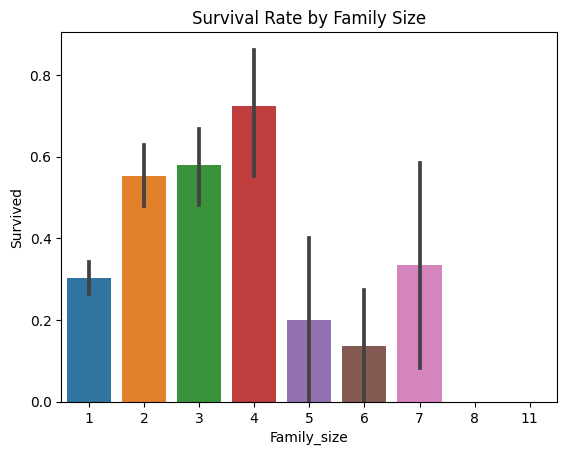

In [13]:
# family size
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family_size'] = df_test['SibSp'] + df_test['Parch'] + 1


sns.barplot(x='Family_size', y='Survived', data=df_train)
plt.title('Survival Rate by Family Size')
plt.show()

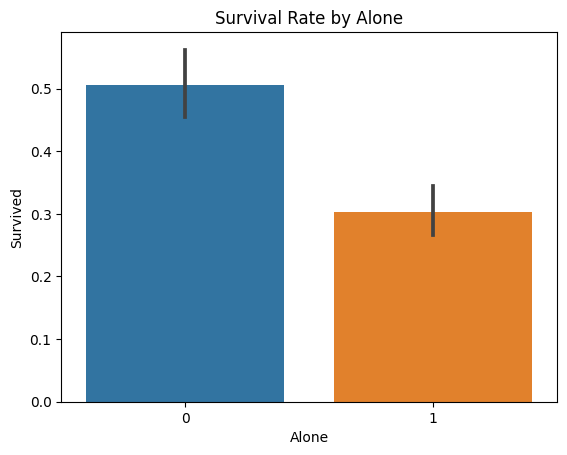

In [14]:
# Alone
df_train['Alone'] = df_train['Family_size'].apply(lambda x: 1 if x == 1 else 0)
df_test['Alone'] = df_test['Family_size'].apply(lambda x: 1 if x == 1 else 0)

sns.barplot(x='Alone', y='Survived', data=df_train)
plt.title('Survival Rate by Alone')
plt.show()

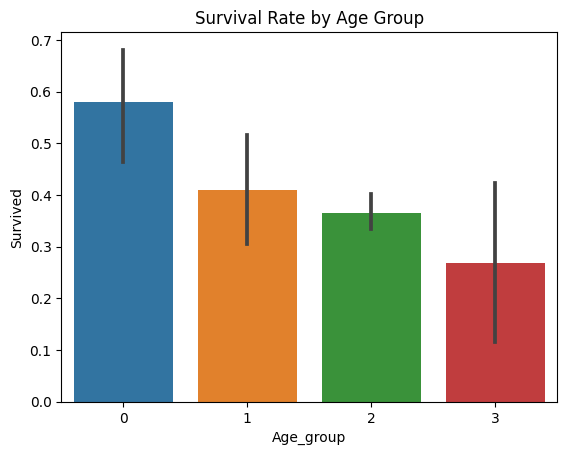

In [15]:
# Define bins for Age
age_bins = [0, 12, 19, 59, float('inf')]
age_labels = ['Child', 'Teenager', 'Adult', 'Senior']

# Create Age_group column
df_train['Age_group'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)
df_test['Age_group'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)

age_mapping = {'Child':0, 'Teenager':1, 'Adult':2, 'Senior':3}
df_train['Age_group'] = df_train['Age_group'].map(age_mapping)
df_test['Age_group'] = df_test['Age_group'].map(age_mapping)

sns.barplot(x='Age_group', y='Survived', data=df_train)
plt.title('Survival Rate by Age Group')
plt.show()

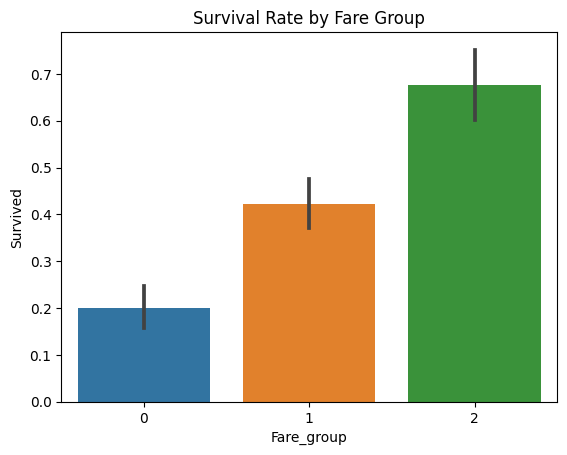

In [16]:
# fare binning
fare_bins = [0, 10.01, 50.01, float('inf')]
fare_labels = ['Low', 'Medium', 'High']

# Create Fare_group column
df_train['Fare_group'] = pd.cut(df_train['Fare'], bins=fare_bins, labels=fare_labels, right=False)
df_test['Fare_group'] = pd.cut(df_test['Fare'], bins=fare_bins, labels=fare_labels, right = False)

fare_mapping = {'Low':0, 'Medium':1, 'High':2}
df_train['Fare_group'] = df_train['Fare_group'].map(fare_mapping)
df_test['Fare_group'] = df_test['Fare_group'].map(fare_mapping)

sns.barplot(x='Fare_group', y='Survived', data=df_train)
plt.title('Survival Rate by Fare Group')
plt.show()

## Dummy Variables

In [17]:
df_test.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Family_size    0
Alone          0
Age_group      0
Fare_group     0
dtype: int64

In [18]:
# from sklearn.preprocessing import OneHotEncoder

# 
# dummy_col = ['Sex', 'Embarked']
# 
# dummy_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
# 
# df_train_dummy = dummy_encoder.fit_transform(df_train[dummy_col]).toarray()
# df_test_dummy = dummy_encoder.transform(df_test[dummy_col]).toarray()
# 
# df_train = pd.DataFrame(df_train_dummy, columns=dummy_encoder.get_feature_names_out()).join(
#     df_train[['Pclass','Age','Age_group','SibSp', 'Fare','Parch', 'Survived', 'Title', 'Family_size', 'Fare_group']])
# df_test = pd.DataFrame(df_test_dummy, columns=dummy_encoder.get_feature_names_out()).join(
#     df_test[['Pclass','Age','Age_group','SibSp', 'Fare','Parch', 'Title', 'Family_size', 'Fare_group']])
# 

In [19]:
sex_mapping = {'male':0, 'female':1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

embarked_mapping = {'S':0, 'C':1, 'Q':2}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

In [20]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Alone,Age_group,Fare_group
0,0,3,0,22.000000,1,0,7.2500,0,4,2,0,2,0
1,1,1,1,38.000000,1,0,71.2833,1,2,2,0,2,2
2,1,3,1,26.000000,0,0,7.9250,0,3,1,1,2,0
3,1,1,1,35.000000,1,0,53.1000,0,2,2,0,2,2
4,0,3,0,35.000000,0,0,8.0500,0,4,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1,1,2,1
887,1,1,1,19.000000,0,0,30.0000,0,3,1,1,1,1
888,0,3,1,29.699118,1,2,23.4500,0,3,4,0,2,1
889,1,1,0,26.000000,0,0,30.0000,1,4,1,1,2,1


## Feature Scaling

In [21]:
# from sklearn.preprocessing import StandardScaler
# 
# ss_scaler = StandardScaler().set_output(transform = 'pandas')
# 
# df_train = ss_scaler.fit_transform(df_train.drop('Survived', axis=1)).join(df_train['Survived'])
# df_test = ss_scaler.transform(df_test)

## Model Fitting

### 1. Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

lr_model = LogisticRegressionCV(Cs = np.logspace(-4,4,20),
                                cv = 5,
                                penalty='l2',
                                solver='liblinear',
                                scoring='accuracy',
                                max_iter=500)
lr_model = lr_model.fit(X_train, y_train)
print(f"Best C: {lr_model.C_[0]}")

y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_prob)


# Find the threshold that gives the best precision-recall tradeoff
optimal_threshold = thresholds[np.argmax(precision_curve + recall_curve)]  
print("Optimal Threshold:", optimal_threshold)

# Apply the new threshold
y_pred_custom = (y_prob >= optimal_threshold).astype(int)

print(f"=== Logistic Regression Metrics ===")
print(f'Accuracy for logistic regression is: {accuracy_score(y_test, y_pred)}')
print(f'Precision for logistic regression is: {precision_score(y_test, y_pred)}')
print(f'Recall for logistic regression is: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate for logistic regression is: {1-recall_score(y_test, y_pred)}')


Best C: 0.615848211066026
Optimal Threshold: 0.19206309257939164
=== Logistic Regression Metrics ===
Accuracy for logistic regression is: 0.8100558659217877
Precision for logistic regression is: 0.796875
Recall for logistic regression is: 0.7083333333333334
False Positive Rate for logistic regression is: 0.29166666666666663


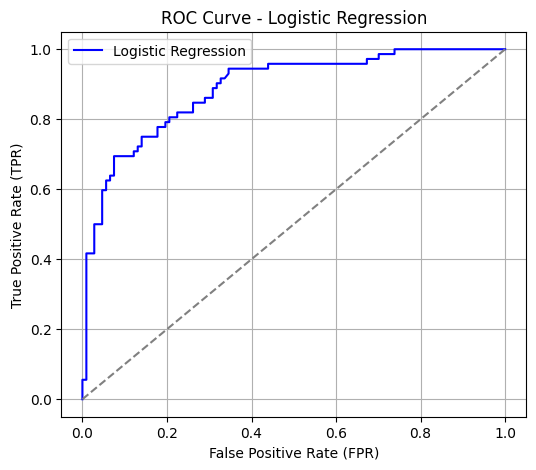

In [23]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="Logistic Regression", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

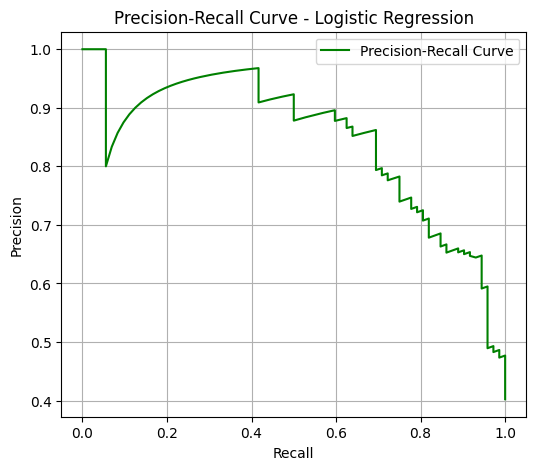

In [24]:
# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall_curve, precision_curve, label="Precision-Recall Curve", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

### 2. LDA

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

lda = LinearDiscriminantAnalysis()

lda = lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
y_prob = lda.predict_proba(X_test)[:, 1] 

fpr, tpr, _ = roc_curve(y_test, y_prob)

precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

print(f"=== Linear Discriminant Analysis Metrics ===")
print(f'Accuracy for LDA is: {accuracy_score(y_test, y_pred)}')
print(f'Precision for LDA is: {precision_score(y_test, y_pred)}')
print(f'Recall for LDA is: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate for LDA is: {1-recall_score(y_test, y_pred)}')

=== Linear Discriminant Analysis Metrics ===
Accuracy for LDA is: 0.8156424581005587
Precision for LDA is: 0.782608695652174
Recall for LDA is: 0.75
False Positive Rate for LDA is: 0.25


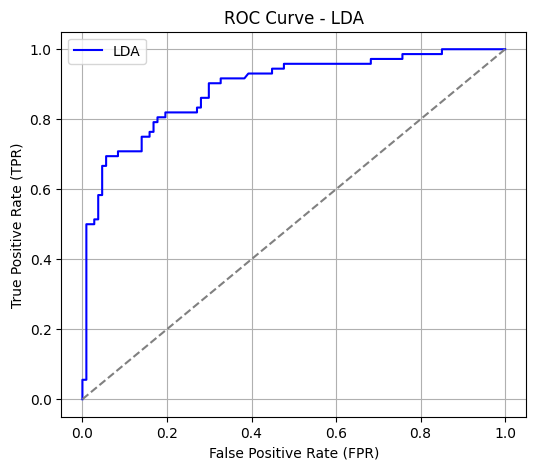

In [26]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="LDA", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - LDA")
plt.legend()
plt.grid()
plt.show()

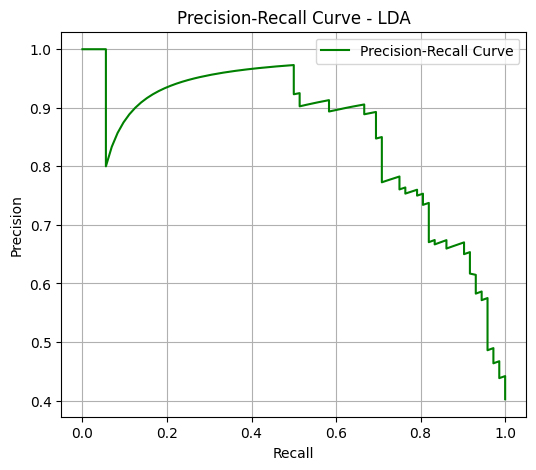

In [27]:
plt.figure(figsize=(6, 5))
plt.plot(recall_curve, precision_curve, label="Precision-Recall Curve", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - LDA")
plt.legend()
plt.grid()
plt.show()

### 3. KNN

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ["uniform", "distance"],
    'metric': ["euclidean", "manhattan", "minkowski"]
}


grid_search = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid= param_grid,
    cv = 5,
    scoring= 'accuracy',
    n_jobs= -1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

knn_model = grid_search.best_estimator_
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC metrics (TPR and FPR)
fpr_values, tpr_values, _ = roc_curve(y_test, y_prob)

# Compute Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

print(f"=== KNN Metrics ===")
print(f'Accuracy for KNN is: {accuracy_score(y_test, y_pred)}')
print(f'Precision for KNN is: {precision_score(y_test, y_pred)}')
print(f'Recall for KNN is: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate for KNN is: {1-recall_score(y_test, y_pred)}')

Best parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
=== KNN Metrics ===
Accuracy for KNN is: 0.7318435754189944
Precision for KNN is: 0.74
Recall for KNN is: 0.5138888888888888
False Positive Rate for KNN is: 0.48611111111111116


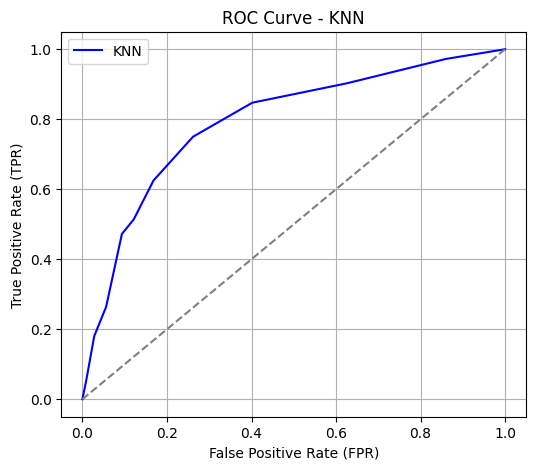

In [29]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_values, tpr_values, label="KNN", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid()
plt.show()

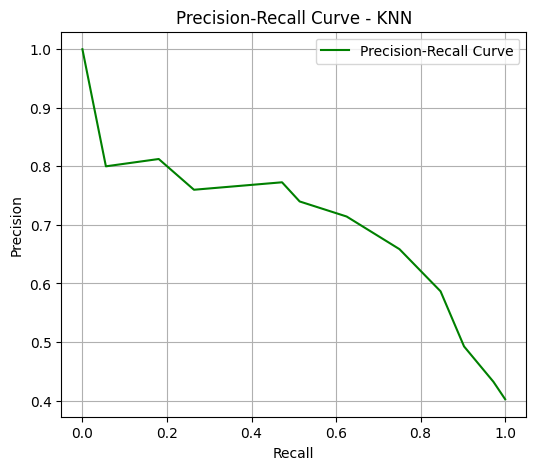

In [30]:
# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall_curve, precision_curve, label="Precision-Recall Curve", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - KNN")
plt.legend()
plt.grid()
plt.show()

## 4. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

param_grid = {
    'n_estimators': [110, 120, 130],  
    'max_depth': [110, 120, 130],     
    'max_features': [2, 3],           
    'criterion': ['entropy','gini'],         
    'min_samples_split': [5, 6, 7],  
    'min_samples_leaf': [3, 4, 5],   
    'max_samples': [0.85, 0.9, 0.95]  
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

rf_model = grid_search.best_estimator_
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

print(f'Accuracy for Random Forest is: {accuracy_score(y_test, y_pred)}')
print(f'Precision for Random Forest is: {precision_score(y_test, y_pred)}')
print(f'Recall for Random Forest is: {recall_score(y_test, y_pred)}')


Best parameters: {'criterion': 'entropy', 'max_depth': 110, 'max_features': 2, 'max_samples': 0.9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 130}
Accuracy for Random Forest is: 0.8547486033519553
Precision for Random Forest is: 0.8709677419354839
Recall for Random Forest is: 0.75


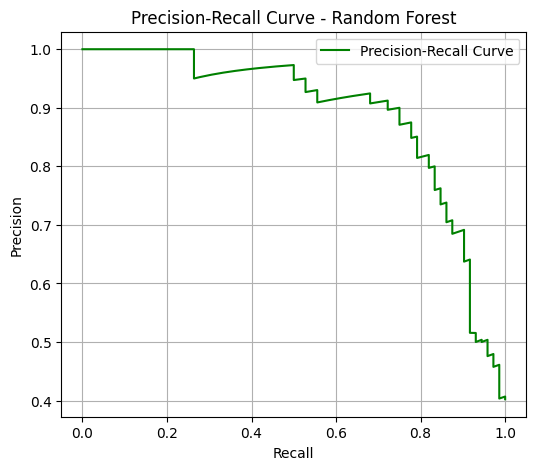

In [39]:
# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall_curve, precision_curve, label="Precision-Recall Curve", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

## 5. XGBoost

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna 

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'eval_metric': 'logloss'
    }

    xgb_model = XGBClassifier(**params, enable_categorical=True)
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    y_pred = xgb_model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print("Accuracy:", trial.value)
print("Best params:", trial.params)

[I 2025-02-09 23:13:10,714] A new study created in memory with name: no-name-24d3e3d9-5aed-47ae-ad14-a99ceb2db9a5
[I 2025-02-09 23:13:10,954] Trial 0 finished with value: 0.8212290502793296 and parameters: {'n_estimators': 444, 'max_depth': 10, 'learning_rate': 0.23208461711386785, 'subsample': 0.8609216803557876, 'colsample_bytree': 0.9158640236459742, 'gamma': 0.18687553288455339, 'reg_alpha': 0.5578190402816932, 'reg_lambda': 0.4342402493069143, 'min_child_weight': 4}. Best is trial 0 with value: 0.8212290502793296.
[I 2025-02-09 23:13:11,186] Trial 1 finished with value: 0.8379888268156425 and parameters: {'n_estimators': 282, 'max_depth': 7, 'learning_rate': 0.1031818609744583, 'subsample': 0.8846435274690871, 'colsample_bytree': 0.9055076839712332, 'gamma': 0.07040539059425664, 'reg_alpha': 0.14027379945833351, 'reg_lambda': 0.29250259832484526, 'min_child_weight': 1}. Best is trial 1 with value: 0.8379888268156425.
[I 2025-02-09 23:13:11,310] Trial 2 finished with value: 0.86033

Best trial:
Accuracy: 0.8770949720670391
Best params: {'n_estimators': 116, 'max_depth': 8, 'learning_rate': 0.022724901317824585, 'subsample': 0.939684891697206, 'colsample_bytree': 0.9876061198697587, 'gamma': 0.14282158519408517, 'reg_alpha': 0.7729603886922343, 'reg_lambda': 0.6470264709661357, 'min_child_weight': 3}


In [47]:
xgb_model = XGBClassifier(n_estimators = 116, 
                          max_depth = 8, 
                          learning_rate = 0.022724901317824585, 
                          subsample = 0.939684891697206,
                          colsample_bytree = 0.9876061198697587, 
                          gamma = 0.14282158519408517, 
                          reg_alpha = 0.7729603886922343,
                          reg_lambda = 0.6470264709661357,
                          min_child_weight = 3,
                          eval_metric = 'logloss',
                          enable_categorical=True)
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

print(f'Accuracy for XGBoost is: {accuracy_score(y_test, y_pred)}')
print(f'Precision for XGBoost is: {precision_score(y_test, y_pred)}')
print(f'Recall for XGBoost is: {recall_score(y_test, y_pred)}')

Accuracy for XGBoost is: 0.8770949720670391
Precision for XGBoost is: 0.9032258064516129
Recall for XGBoost is: 0.7777777777777778


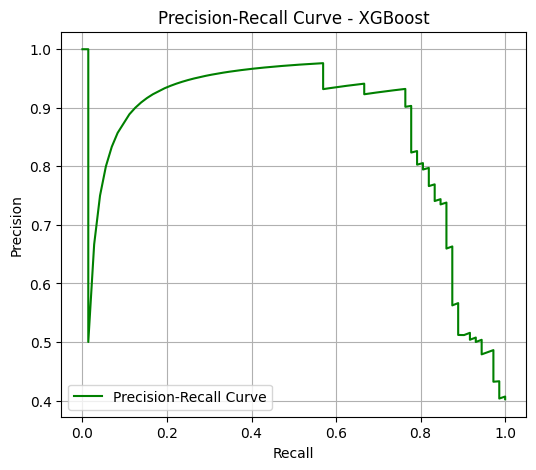

In [48]:
# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall_curve, precision_curve, label="Precision-Recall Curve", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend()
plt.grid()
plt.show()

## 6. Extra Trees

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

param_grid = {
    'n_estimators': [35, 40, 45],  
    'max_depth': [None, 25, 30],  
    'max_features': ['log2', 0.7, 0.8],  
    'min_samples_split': [7, 8, 9],  
    'min_samples_leaf': [4, 5, 6],   
    'criterion': ['entropy', 'gini']         
}

grid_search = GridSearchCV(estimator=ExtraTreesClassifier(),param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

et_model = grid_search.best_estimator_
y_pred = et_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

print(f'Accuracy for Extra Trees is: {accuracy_score(y_test, y_pred)}')
print(f'Precision for Extra Trees is: {precision_score(y_test, y_pred)}')
print(f'Recall for Extra Trees is: {recall_score(y_test, y_pred)}')

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 35}
Accuracy for Extra Trees is: 0.8603351955307262
Precision for Extra Trees is: 0.8852459016393442
Recall for Extra Trees is: 0.75


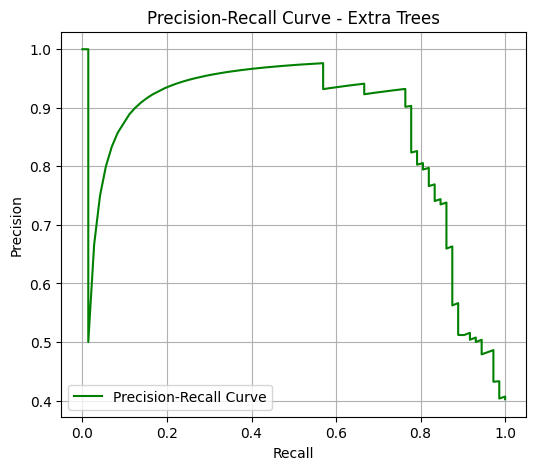

In [54]:
# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall_curve, precision_curve, label="Precision-Recall Curve", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Extra Trees")
plt.legend()
plt.grid()
plt.show()

## Submission

In [ ]:
y_pred = rf_model.predict(df_test)

submission = pd.DataFrame({'PassengerId': Id,
              'Survived':y_pred})
submission.to_csv('~/Desktop/submission.csv', index=False)